# PRE-PROCESSING et MACHINE LEARNING

## Importer les librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

df=pd.read_csv("df_clean.csv")

In [2]:
df.select_dtypes(include='object').columns

Index(['Name', 'Platform', 'Genre', 'Publisher', 'Support_JVC',
       'langue_parlée_JVC', 'texte_JVC'],
      dtype='object')

In [3]:
for col in df.select_dtypes(include='object').columns:
    print(df[col].nunique())
    

4194
27
12
291
9
3
3


## Encodage LabelEncoder et OneHotEncoder

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Platform']= le.fit_transform(df['Platform'])
df['Genre']= le.fit_transform(df['Genre'])
df['Support_JVC']= le.fit_transform(df['Support_JVC'])
df['langue_parlée_JVC']= le.fit_transform(df['langue_parlée_JVC'])
df['texte_JVC']= le.fit_transform(df['texte_JVC'])

In [5]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

obj_ohe=df[['Name', 'Publisher']]

onehot_encoded_cols = ohe.fit_transform(obj_ohe)
column_names = ohe.get_feature_names_out(input_features=obj_ohe.columns)

df_obj_encoded=pd.DataFrame(onehot_encoded_cols, columns=column_names)

df = pd.concat([df.drop(obj_ohe.columns, axis=1), df_obj_encoded], axis=1)
df= df.drop('Unnamed: 0', axis=1)

df.head()

c:\Users\debor\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Meta_NP,Meta_VP,...,Publisher_Xicat Interactive,Publisher_Xplosiv,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_id Software,Publisher_inXile Entertainment
0,9,1985.0,4,29.08,3.58,6.81,0.77,40.24,84.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,1989.0,5,23.20,2.26,4.22,0.58,30.26,65.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22,2006.0,3,14.03,9.20,2.93,2.85,29.02,58.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2005.0,9,9.07,11.00,1.93,2.75,24.76,83.0,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22,2007.0,10,8.94,8.03,3.60,2.15,22.72,80.0,63.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
target=df['Global_Sales']

# Création jeu d'entraînement et jeu de test

In [7]:
from sklearn.model_selection import train_test_split

y=df['Global_Sales']
X=df.drop('Global_Sales', axis=1)

X_train, X_test, y_train, y_test = train_test_split(df, y,  test_size=0.2, random_state=42)


# TPOT : choix du meilleur modèle de ML

In [8]:
# Pour la régression
from tpot import TPOTRegressor
# Paramétrage du TPOTRegressor
tpot_regression = TPOTRegressor(generations=5, population_size=50, cv=5, scoring='neg_mean_absolute_error', verbosity=2, random_state=42, n_jobs=-1)
 
# Application de TPOT à notre jeu de données train 
tpot_regression.fit(X_train, y_train)

# Calcul du taux de bonnes prédictions
print(tpot_regression.score(X_test, y_test))
# Extraction du code généré par TPOT pour modifier le pipeline créé
tpot_regression.export('tpot_vgsales_pipeline.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1.2420274629143262e-15

Generation 2 - Current best internal CV score: -1.2420274629143262e-15

Generation 3 - Current best internal CV score: -1.2420274629143262e-15

Generation 4 - Current best internal CV score: -1.2420274629143262e-15

Generation 5 - Current best internal CV score: -1.2420274629143262e-15

Best pipeline: LassoLarsCV(input_matrix, normalize=True)
-2.1722777686228475e-15


c:\Users\debor\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


# PCA

In [8]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
 
pca = PCA()
 
# Contient les coordonnées de l'ACP sur les lignes.
X_PCA = pca.fit_transform(df)
 
tsne = TSNE(n_components=2, random_state=0)
X_TSNE_PCA = tsne.fit_transform(X_PCA)

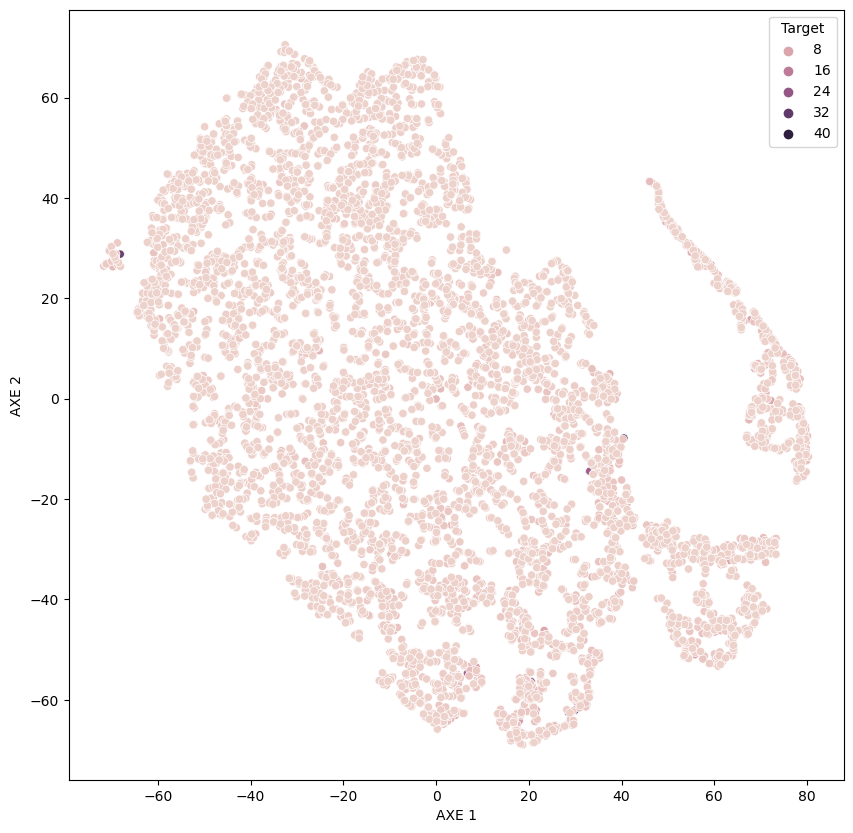

In [9]:
df_TSNE_PCA = pd.DataFrame({'AXE 1': X_TSNE_PCA[:, 0], 'AXE 2': X_TSNE_PCA[:, 1], 'Target': target})
 
plt.figure(figsize=(10, 10))
sns.scatterplot(x='AXE 1', y='AXE 2', hue='Target', data=df_TSNE_PCA);

# Regression linéaire

In [10]:
y = np.array(y)
y = y.reshape(-1, 1)  
print(y.shape)  
print(X.shape) 

(5838, 1)
(5838, 4503)


In [12]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train, y_train)

# Affiche les coefficients estimés lors de l'entraînement du modèle.
print(model.intercept_)
print(model.coef_[0])

# Calcule les prédictions du modèle sur le jeu de test, puis les erreurs de prédictions
predictions = model.predict(X_test)
erreurs = predictions - y_test
print(erreurs)


#Afficher le score (R²) du modèle sur le jeu de données de d'entraînement et de test.
print('Coefficient de détermination du modèle sur train:', model.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', model.score(X_test, y_test))

1.1546319456101628e-12
2.7822706458197563e-15
4581   -2.537831e-13
177     6.643575e-13
167    -7.793766e-13
3721   -8.556766e-13
2339   -2.634004e-13
            ...     
4950    5.555972e-14
2232   -3.025913e-13
2329   -2.576273e-13
4558    1.198985e-12
1175    2.495781e-13
Name: Global_Sales, Length: 1168, dtype: float64
Coefficient de détermination du modèle sur train: 1.0
Coefficient de détermination du modèle sur test: 1.0


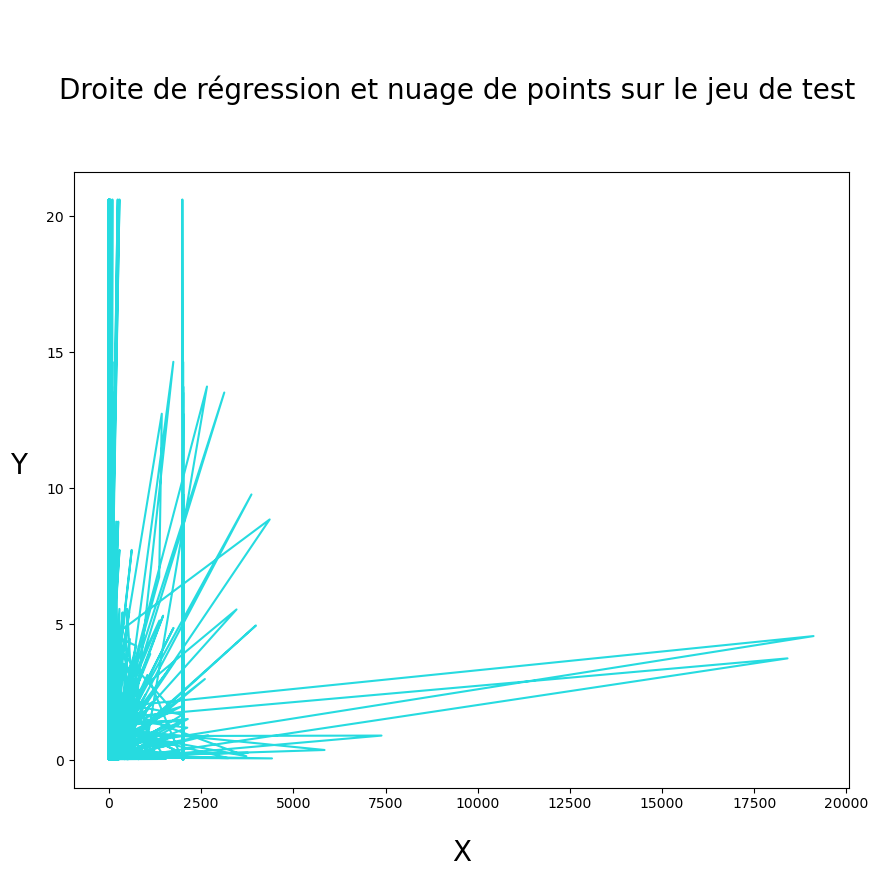

In [13]:
plt.figure(figsize=(10, 8))

#plt.scatter(X_test, y_test, color='#4529de')

plt.plot(X_test, predictions ,color='#26dbe0')

plt.title("\n\nDroite de régression et nuage de points sur le jeu de test \n\n", fontsize=20)

plt.xlabel("X",labelpad=20, fontsize=20)

plt.ylabel("Y", rotation=360, labelpad=20, fontsize=20)

plt.show()

## Modellisation

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC # utile sur dataset de 1000 à 2000 données
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

In [15]:
model=DecisionTreeClassifier(random_state=0)

model_1 = RandomForestClassifier(random_state=0)


In [16]:
model_2 = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k=10),
                      RandomForestClassifier(random_state=0))

preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [17]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost= make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor,StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [18]:
dict_of_models={'RandomForest':RandomForest, 'AdaBoost':AdaBoost, 'SVM':SVM, 'KNN':KNN}

## Procédure d'évaluation

In [19]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [20]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

In [21]:
for name,model in dict_of_models.items():
    print(name)
    evaluation(model)

RandomForest


MemoryError: Unable to allocate 353. GiB for an array with shape (4670, 10149764) and data type float64